In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv('../data/yield_final.csv')

## DataFrame Description and Feature Distribution

In [3]:
df.shape

(15398, 7)

In [4]:
df.describe()

,year,yield_hg_ha,average_rain_fall_mm_per_year,pesticide_tonnes,avg_temp
count,15398.000000,15398.000000,15398.000000,15398.000000,15398.000000
mean,2003.199636,72455.970256,1156.709443,15598.158191,19.808131
std,7.754457,80609.455560,745.000011,36456.503861,6.675768
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1997.000000,18258.250000,608.000000,289.900000,15.630000
50%,2003.000000,40314.500000,1032.000000,2280.000000,20.608333
75%,2010.000000,99667.250000,1651.000000,13697.000000,25.800000
max,2016.000000,540003.000000,3240.000000,395646.000000,30.420000


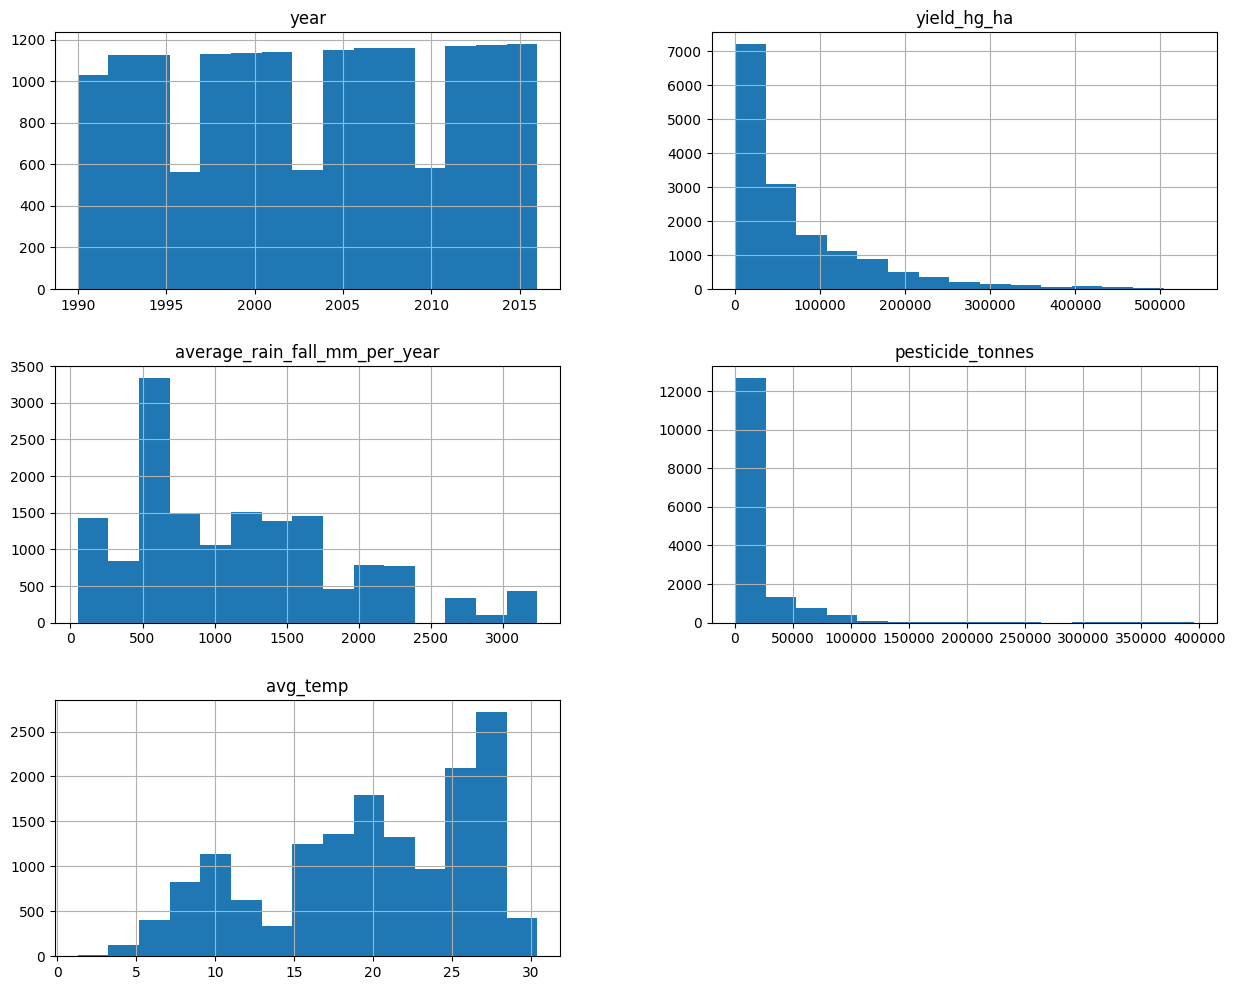

In [5]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

## Feature Correlation

In [6]:
list(df.columns)

['country',
 'crop',
 'year',
 'yield_hg_ha',
 'average_rain_fall_mm_per_year',
 'pesticide_tonnes',
 'avg_temp']

In [7]:
categorical = ['country','crop']
numerical = ['year',
 'yield_hg_ha',
 'average_rain_fall_mm_per_year',
 'pesticide_tonnes',
 'avg_temp']

In [8]:
corr_matrix = df[numerical].corr(method='pearson')

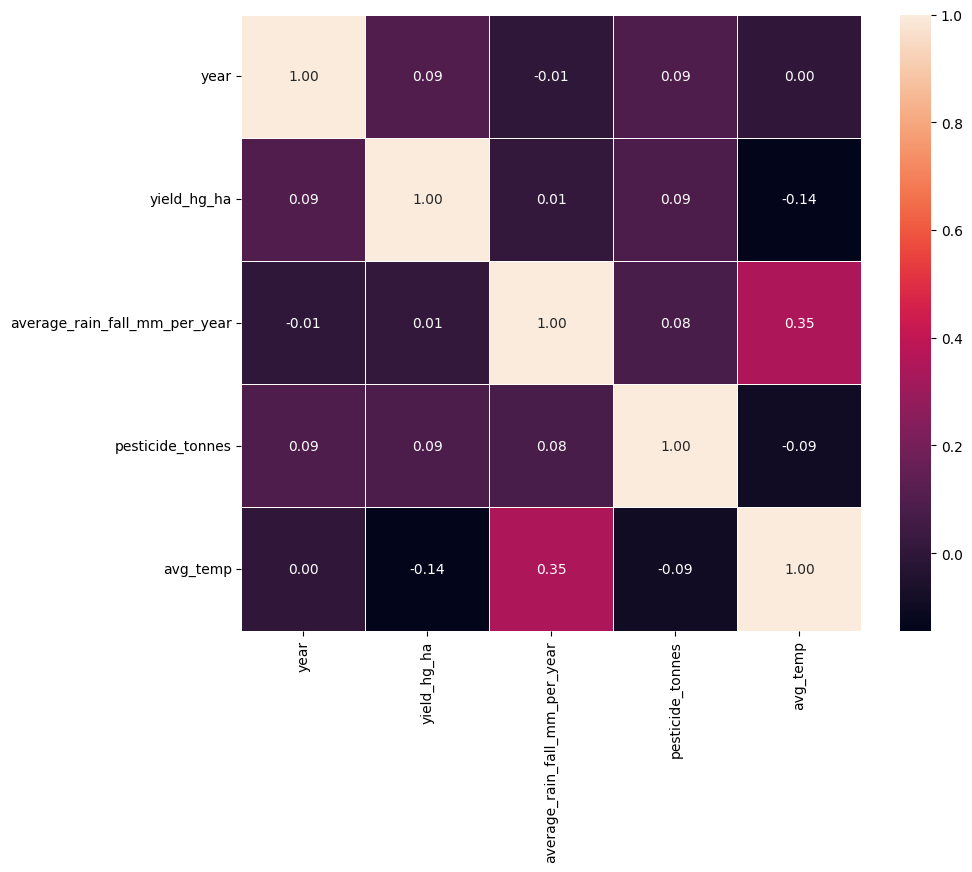

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f", linewidth=.5)
plt.show()

note that corrwith() is used when correlation needs to be computed between two dataframes 
and corr() is used when the correlation needs to be computed with the same dataframe

**Notes:**

1. There's a moderate correlation between `avg_temp` and `average_rain_fall_mm_per_year`, i.e when average temperature grows, the average rainfall grows as well.

- In tropical or monsoon regions, warmer air holds more moisture → more rainfall (positive correlation).
- In arid or continental regions, higher temps mean less rainfall due to drought and evaporation (negative correlation).

Since the dataset is global and multi-year, those patterns average out → resulting in a moderate positive correlation (like 0.3–0.4).


2. The correlation coefficient between `yield_hg_ha` and `avg_temp` is -0.14. It indicates that higher temperatures correspond to (moderately) lower yields.  

### Average yields by Country

In [34]:
df_high_yield=df.groupby(['country'])['yield_hg_ha'].mean().sort_values(ascending=False).reset_index()

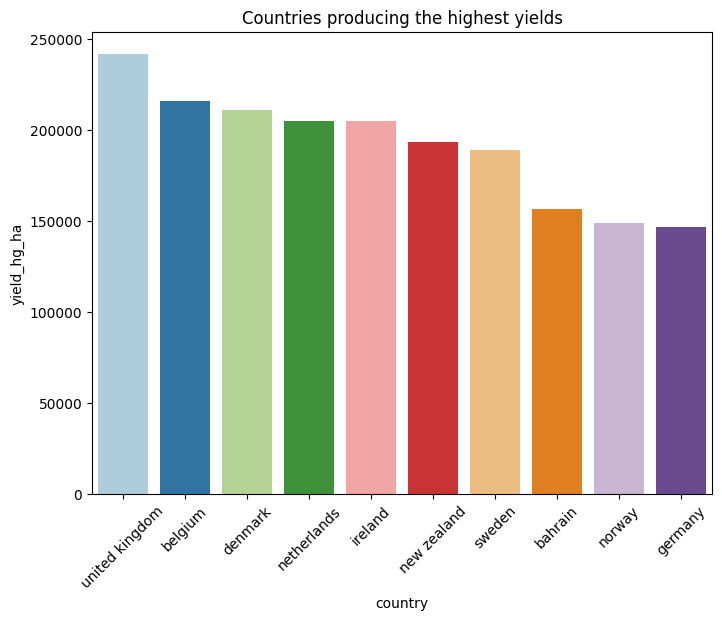

In [54]:
plt.figure(figsize=(8, 6))
sns.barplot(x='country', y='yield_hg_ha', hue='country', data=df_high_yield.head(10), palette='Paired', dodge=False)
plt.title('Countries producing the highest yields')
plt.xticks(rotation=45)
plt.show()

**UK produces the highest crop yields, followed by Belgium and Denmark**

### Average Yield Over Years by Crop

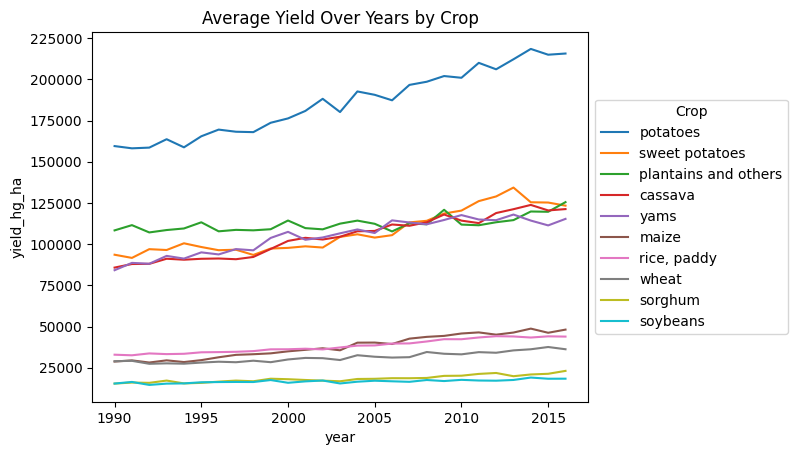

In [51]:
df_high_yield_crop=df.groupby(['crop', 'year'])['yield_hg_ha'].mean().sort_values(ascending=False).reset_index()
sns.lineplot(x='year', y='yield_hg_ha', hue='crop', data=df_high_yield_crop)
plt.title('Average Yield Over Years by Crop')
plt.legend(
    title='Crop',
    loc='center left',        # position reference
    bbox_to_anchor=(1, 0.5)   # x=1 means just outside right edge, y=0.5 centers vertically
)
plt.show()

**Potato yield is considerably higher than other crops**

**Most crop yields have remained the same over the years - with minor fluctuations**


### Average Pesticide use over the years

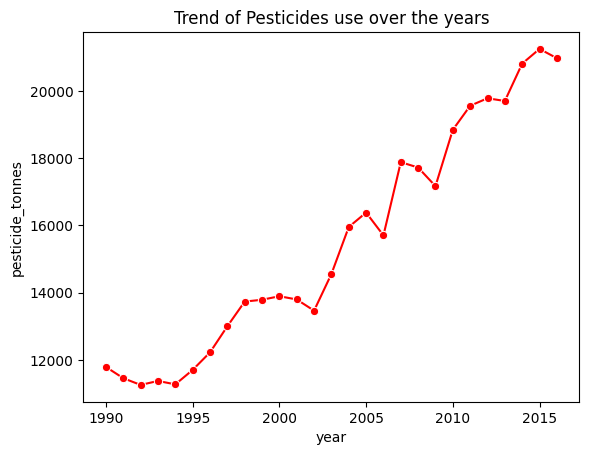

In [61]:
df_pesticides_yearly=df.groupby(['year'])['pesticide_tonnes'].mean().sort_values(ascending=False).reset_index()
sns.lineplot(x='year', y='pesticide_tonnes', data=df_pesticides_yearly, color='red', marker='o')
plt.title('Trend of Pesticides use over the years')
plt.show()

**As expected, pesticides usage has gone up significantly over the last 2 decades**

In [ ]:
## Relationship between Pesticides usage and Crop Yield

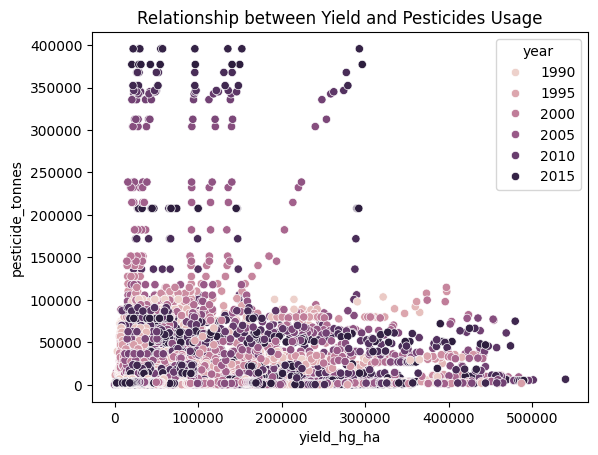

In [118]:
# df_pesticides_country=df.groupby(['country'])['pesticide_tonnes'].mean().sort_values(ascending=False).reset_index()
sns.scatterplot(data=df, x="yield_hg_ha", y="pesticide_tonnes", hue='year')
plt.title('Relationship between Yield and Pesticides Usage')
plt.show()

- **Higher amount of pesticides used in 21 for not a lot of yield**

### Impact of weather on Pesticides Usage

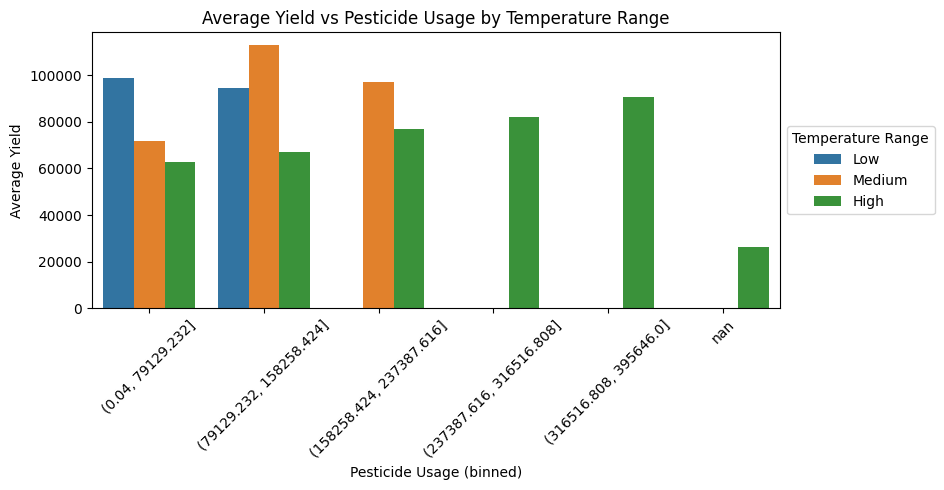

In [110]:
df['temp_range'] = pd.cut(df['avg_temp'], bins=3, labels=['Low', 'Medium', 'High'])

min_val = df['pesticide_tonnes'].min()
max_val = df['pesticide_tonnes'].max()
bins = np.linspace(min_val, max_val, 6)  

df['pesticide_bin'] = pd.cut(df['pesticide_tonnes'], bins=bins)  
df['pesticide_bin_str'] = df['pesticide_bin'].astype(str)

df_summary = df.groupby(['temp_range', 'pesticide_bin_str'], observed=True)['yield_hg_ha'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    x='pesticide_bin_str',
    y='yield_hg_ha',
    hue='temp_range',
    data=df_summary
)
plt.xticks(rotation=45)
plt.xlabel('Pesticide Usage (binned)')
plt.ylabel('Average Yield')
plt.title('Average Yield vs Pesticide Usage by Temperature Range')
plt.tight_layout()
plt.legend(
    title='Temperature Range',
    loc='center left',        # position reference
    bbox_to_anchor=(1, 0.5)   # x=1 means just outside right edge, y=0.5 centers vertically
)
plt.show()


- **when the temperature is low, pesticide usage is often low**
  
- **in higher temperatures, pesticide usage is higher** 